<a href="https://colab.research.google.com/github/Nagul21/Task_7_ML/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import seaborn as sns

**Importing the dataset**

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.describe

<bound method NDFrame.describe of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

**Splitting the dataset into the Training set and Test set**

In [4]:
X = df[["Age","EstimatedSalary"]]
Y = df["Purchased"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3)

**Feature Scaling**

In [6]:
ss = StandardScaler()
ss.fit(x_train)
ssx_train = ss.transform(x_train)
ssx_test = ss.transform(x_test)
List_of_accuracy = []
for i in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(ssx_train,y_train)
  t_pred = knn.predict(ssx_test)
  List_of_accuracy.append(accuracy_score(y_test,t_pred))

maxi_val =max(List_of_accuracy)
Total_neighbours = List_of_accuracy.index(maxi_val)

**Fitting K-NN to the Training set**

In [7]:
new_knn = KNeighborsClassifier(n_neighbors=Total_neighbours)
new_knn.fit(ssx_train, y_train)

KNeighborsClassifier(n_neighbors=7)

**Predicting the Test set results**

In [8]:
t_pred = new_knn.predict(ssx_test)

**Making the Confusion Matrix**

In [9]:
print(confusion_matrix(y_test,t_pred))
confustion_mat = confusion_matrix(y_test,t_pred)

[[66  9]
 [ 4 41]]


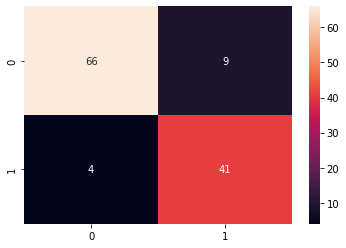

In [10]:
sns.heatmap(confustion_mat, annot=True)